# COVID-19 & Its effect on the U.S.' Economy And Politics

<img src="https://blogs.iadb.org/ideas-matter/wp-content/uploads/sites/12/2020/03/propagacio%CC%81n-coronavirus-covid-19-Ame%CC%81rica-Latina-Caribe-Europa.jpg" alt="CV">

The first case of COVID-19 (Corona Virus) was discovered in Wuhan, China in December 2019. It then quickly spreaded across the Province Hubei, and around the world, and killing hundred thousands of people. What started as a common flu disease has turned the world upside down, making it one of the worst pandemics in the modern history.

In this analysis, I'm going to take a deeper look at cases around the world, and how it has affected the Economy and Politics in the U.S.

## Table of Contents

- **I. COVID-19**

    - a. Total Cases over the World over time
   
    - b. The U.S. Confirmed Cases by States
 
- **II. Politics**

- **III. Finance**

    - a. Overall Market

    - b. Tech & Airlines

- **IV. Conclusion**
- **V. Reference**

In [94]:
import numpy as np
import pandas as pd
import glob
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
%matplotlib inline

# I. COVID-19

First, let's take a look at number of COVID-19 cases right now. The data is provided by John Hopkins University and updated daily. 

In [3]:
# load data from https://github.com/CSSEGISandData/COVID-19
confirmed = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv?raw=true', index_col = False)
death = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv?raw=true', index_col = False)
recovered = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv?raw=true', index_col = False)


In [4]:
# take a look at the data
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,989,989,989,1005,1005,1024,1024,1045,1045,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171


In [5]:
#Adding Total of Cases for each df and drop unnecessary columns
confirmed = confirmed.groupby('Country/Region').sum().drop(columns = ['Lat', 'Long'])
confirmed.loc['Total Confirmed'] = confirmed.sum()

death = death.groupby('Country/Region').sum().drop(columns = ['Lat', 'Long'])
death.loc['Total Death'] = death.sum()

recovered = recovered.groupby('Country/Region').sum().drop(columns = ['Lat', 'Long'])
recovered.loc['Total Recovered'] = recovered.sum()

In [6]:
#Prepare data before visualization
str_dates = list(confirmed.columns)
dates = [datetime.strptime(x, '%m/%d/%y') for x in str_dates]

### a. Total Cases over the World over time

In [21]:
#Visual Total Cases over the world
plt.figure(figsize=[30,15])
fig = go.FigureWidget()
fig.add_trace(go.Scatter(x= dates, y= death.loc['Total Death'], 
                         fill="tonexty", fillcolor='red', name = 'Total Death')) 
fig.add_trace(go.Scatter(x= dates, y= recovered.loc['Total Recovered'], 
                         fill="tonexty", fillcolor='green', name = 'Total Recovered'))
fig.add_trace(go.Scatter(x= dates, y= confirmed.loc['Total Confirmed'], 
                         fill="tonexty", fillcolor='orange', name = 'Total Confirmed'))

fig.update_layout(xaxis_rangeslider_visible=True, title='Total Cases Over Time')
iplot(fig)

<Figure size 2160x1080 with 0 Axes>

From less than **700 cases** on Jan 23rd, 2020, we have over **23 million** cases currently. Overall, the death rate is 3.5% around the world. 

In [7]:
#Prepare Top Countries with Confirmed Data to visualize
top_confirm = confirmed.sort_values(confirmed.columns[-1], ascending = False).drop(index = 'Total Confirmed').head(10)
top_confirm = top_confirm.iloc[:,[- 1]]
top_confirm.reset_index(inplace = True)

In [19]:
#Visualize Top Countries with Confirmed Cases
fig = px.bar(top_confirm, x= top_confirm.columns[1], y= 'Country/Region', 
             width=700, title = 'Top 10 Countries with Most Confirmed Cases as of ' + top_confirm.columns[1], 
             text = top_confirm.columns[1])
fig.update_layout(yaxis_categoryorder = 'total ascending', xaxis_title="Number of Confirmed Cases (Millions)",
    yaxis_title=" ")
iplot(fig)

In [38]:
last_confirm = confirmed.iloc[:,[-1]].rename(columns={confirmed.columns[-1]: 'Confirmed'})
last_death = death.iloc[:,[-1]].rename(columns={death.columns[-1]: 'Death'})
death_confirm = pd.merge(last_confirm, last_death, 
                         on='Country/Region', how='inner').sort_values('Death', 
                                                                       ascending = False).head(10).reset_index()

In [9]:
fig = px.scatter(death_confirm, 
                 x='Confirmed', y='Death', color='Country/Region', size='Confirmed', 
                 height=700, text='Country/Region',  
                 title='Top 10 Countries with Deaths vs Confirmed')
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)
iplot(fig)

The U.S. is leading the world with most confirmed cases, **5.7 million cases**! Next to it is Brazil - 3.6M cases and India with 3.1M cases. 

For [Brazil](https://www.nbcnews.com/news/latino/brazil-not-letting-doctors-without-borders-help-indigenous-tribes-against-n1237679), the coronavirus pandemic has endangered Indigenous communities with no access to healthcare in remote parts of the Amazon and other parts of Brazil whose communal living under large dwellings make social distancing impossible. Moreover, the failure of the right-wing government President Jair Bolsonaro in handling the situation, and belittling the second wave of the disease have made it worse.

[India](https://www.bloomberg.com/news/articles/2020-08-23/india-marks-grim-covid-19-milestone-with-3-million-infections) is one of the fastest-growing in the world with more than 65,000 new infections being reported each day, higher than both the U.S. and Brazil, the two most-affected countries. The government of Prime Minister Narendra Modi faces a growing challenge to control the disease, which is shifting from large cities like Mumbai and New Delhi to India’s crowded villages where medical infrastructure is weaker. 

In China, Italy and South Korea, after their strict quarantine control, the number of new cases has slowly stopped increasing. The situation is very different for Russia, where number of cases has been increasing fast since mid-April. The government of Putin is pushing for producing the [new vaccine](https://www.cnn.com/2020/08/11/europe/russia-coronavirus-vaccine-putin-intl/index.html), but it draws outrage over safety since the vaccine has not been tested enough. 

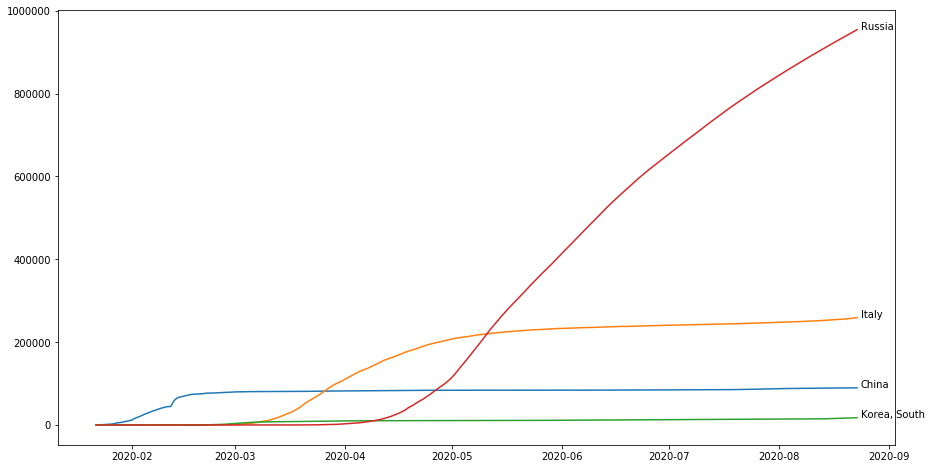

In [21]:
plt.figure(figsize=[15,8])
big = ['China','Italy', 'Russia', 'Korea, South']
for index, row in confirmed.iterrows():
    if index in big:
        plt.plot(dates, row)
        plt.annotate(index,xy=(plt.xticks()[0][-1]-8, row[-1]))

For countries with less than 10,000 confirmed cases, the number is still increasing non-stop, showing that the pandemic will not stop anytime soon. The world might need to accept the new "normal".

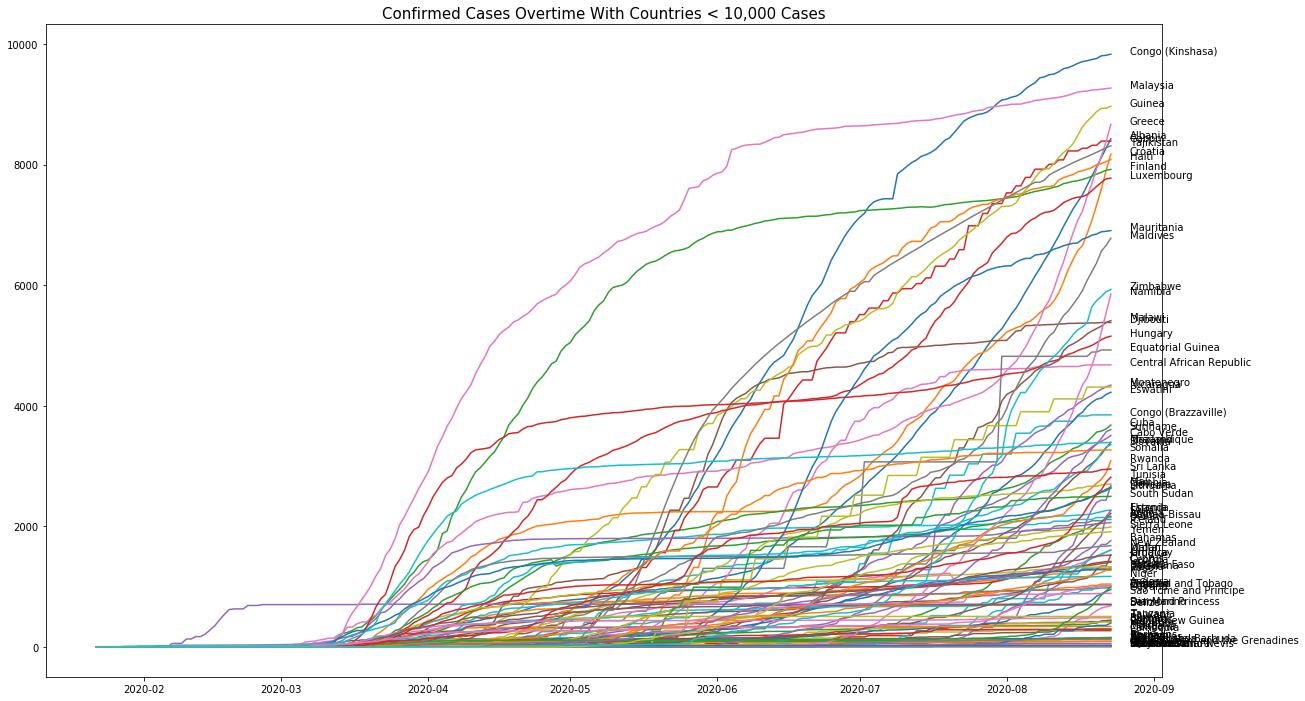

In [27]:
plt.figure(figsize=[20,12])
for index, row in confirmed.iterrows():
    if row[-1] < 10000:
        plt.plot(dates, row)
        plt.annotate(index,xy=(plt.xticks()[0][-1]-5, row[-1]))
        plt.title('Confirmed Cases Overtime With Countries < 10,000 Cases', size = 15)

## b. The U.S. Confirmed Cases by States

In [29]:
#Load Data
us_confirm = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports_us/08-23-2020.csv?raw=true', index_col = False)
us_confirm.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-08-24 04:30:23,32.3182,-86.9023,115060,2013,44684.0,68363.0,1.0,2346.637951,921669.0,13502.0,1.749522,84000001,USA,18797.353149,11.734747
1,Alaska,US,2020-08-24 04:30:23,61.3707,-152.4044,4741,32,1745.0,2964.0,2.0,648.080433,327440.0,NaN,0.674963,84000002,USA,44760.062607,NaN
2,American Samoa,US,2020-08-24 04:30:23,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,1514.0,NaN,NaN,16,ASM,2721.015079,NaN
3,Arizona,US,2020-08-24 04:30:23,33.7298,-111.4312,198103,4771,29147.0,164185.0,4.0,2721.674713,1150869.0,21241.0,2.408343,84000004,USA,15811.426657,10.722200
4,Arkansas,US,2020-08-24 04:30:23,34.9697,-92.3731,56574,687,50251.0,5636.0,5.0,1874.674432,665700.0,3920.0,1.214339,84000005,USA,22059.086674,6.928978


In [30]:
us_state = {'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR', 
    'California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE', 'District of Columbia': 'DC', 
    'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME',
    'Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS',
    'Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Northern Mariana Islands':'MP',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}
us_confirm['code'] = us_confirm['Province_State'].map(us_state)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,code
0,Alabama,US,2020-08-24 04:30:23,32.3182,-86.9023,115060,2013,44684.0,68363.0,1.0,2346.637951,921669.0,13502.0,1.749522,84000001,USA,18797.353149,11.734747,AL
1,Alaska,US,2020-08-24 04:30:23,61.3707,-152.4044,4741,32,1745.0,2964.0,2.0,648.080433,327440.0,NaN,0.674963,84000002,USA,44760.062607,NaN,AK
2,American Samoa,US,2020-08-24 04:30:23,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,1514.0,NaN,NaN,16,ASM,2721.015079,NaN,AS
3,Arizona,US,2020-08-24 04:30:23,33.7298,-111.4312,198103,4771,29147.0,164185.0,4.0,2721.674713,1150869.0,21241.0,2.408343,84000004,USA,15811.426657,10.722200,AZ
4,Arkansas,US,2020-08-24 04:30:23,34.9697,-92.3731,56574,687,50251.0,5636.0,5.0,1874.674432,665700.0,3920.0,1.214339,84000005,USA,22059.086674,6.928978,AR


In [33]:
#Show U.S Confirmed Cases by state
fig = go.Figure(data=go.Choropleth(
    locations=us_confirm['code'], 
    z = us_confirm['Confirmed'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = "Confirmed Cases",
))

fig.update_layout(
    title_text = 'Number of Confirmed Cases in the U.S. as of 8/23/2020',
    geo_scope='usa', # limite map scope to USA
)
iplot(fig)

As mentioned above, U.S. is leading the wolrd in number of COVID-19 cases. California, Texas, Florida, and New York are the top states with cases. The number of new cases is slowing down, as the 7-day average of coronavirus deaths dropped below 1,000 a day over the weekend for the first time since late July. 

However, the situation might get complicated, as planned reopening of schools, which has already led to outbreaks at universities in at least [19 states](https://www.cnn.com/2020/08/24/health/us-coronavirus-monday/index.html) K-12 school districts are still trying to figure out how to navigate the academic year during the pandemic.

# II. Politics

Is Trump supported by the U.S. citizens? What is his approval rating right now?

In [277]:
#Loading data
trump = pd.read_csv('/Users/chauchu/Downloads/approval_topline.csv')
trump.head()

,president,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,timestamp
0,Donald Trump,Voters,8/21/2020,42.217134,46.648896,37.785372,54.053130,58.978893,49.127367,09:38:23 21 Aug 2020
1,Donald Trump,Adults,8/21/2020,40.926807,44.558043,37.295571,54.983414,58.804909,51.161920,09:36:05 21 Aug 2020
2,Donald Trump,All polls,8/21/2020,41.838234,46.323752,37.352717,54.115066,58.852027,49.378105,09:34:36 21 Aug 2020
3,Donald Trump,All polls,8/20/2020,42.002667,46.328614,37.676720,53.951990,58.491538,49.412441,14:03:42 20 Aug 2020
4,Donald Trump,Adults,8/20/2020,41.195789,44.732425,37.659152,54.683667,58.136434,51.230900,14:05:09 20 Aug 2020


In [278]:
# Including All Polls only and drop unnecessary columns
trump = trump.iloc[::-1]
trump = trump[trump['subgroup']== 'All polls']
trump = trump[['modeldate','approve_estimate','disapprove_estimate']].reset_index().drop(columns= 'index')
trump.head()

,modeldate,approve_estimate,disapprove_estimate
0,1/23/2017,45.46693,41.26452
1,1/24/2017,45.44264,41.87849
2,1/25/2017,47.76497,42.52911
3,1/26/2017,44.37598,41.06081
4,1/27/2017,44.13586,41.67268


In [284]:
#Prepare data for visuals
x = list(trump['modeldate'])
xticks = x[::60]

approve = trump['approve_estimate']
disap = trump['disapprove_estimate']

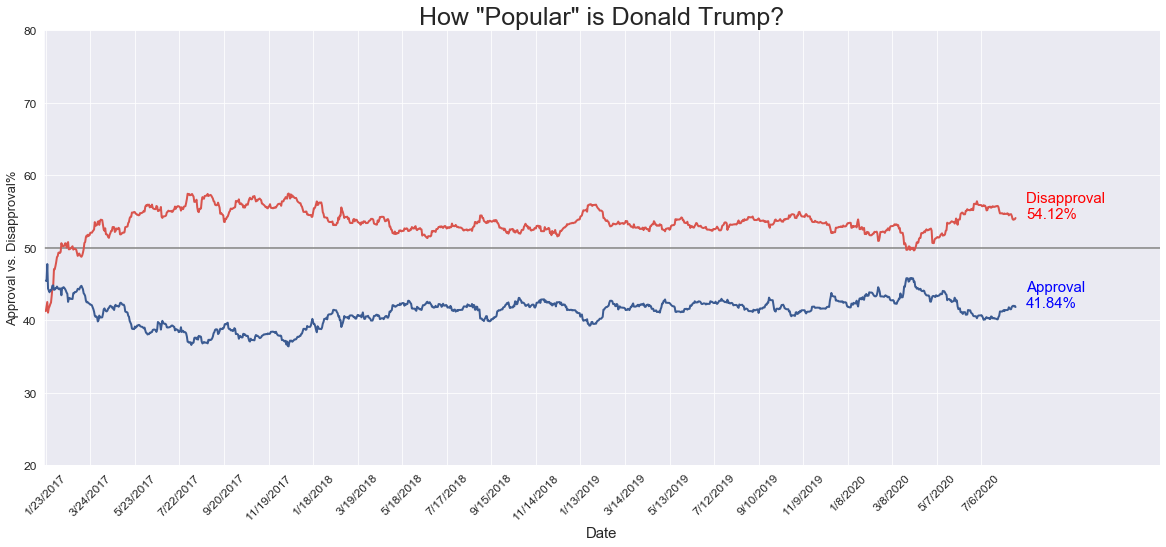

In [307]:
#Visual Data
sns.set_style("darkgrid")
plt.figure(figsize=[20,8])
plt.plot(x, disap, sns.xkcd_rgb["pale red"], lw=2)
plt.plot(x, approve, sns.xkcd_rgb["denim blue"], lw=2)
plt.hlines(y=50, xmin=-3, xmax=2500, color ='grey')
plt.ylim(20,80)
plt.xlim(-3,1500)
plt.xticks(xticks, rotation = 45, size = 12)
plt.yticks(size=12)
plt.annotate('Approval \n'+str(approve.values[-1].round(2))+'%', xy=(plt.xticks()[0][-1]+60, 
                                                                     approve.values[-1]), color='blue', size = 15)
plt.annotate('Disapproval \n'+str(disap.values[-1].round(2))+'%', xy=(plt.xticks()[0][-1]+60, 
                                                                      disap.values[-1]), color='red', size = 15)
plt.xlabel('Date', size = 15)
plt.ylabel("Approval vs. Disapproval%", size = 13)
plt.title('How "Popular" is Donald Trump?', size = 25)
plt.show()

Overall, Trump's aprroval's ratings are average, with numbers in the high 30s to mid 40s. Surprisingly, his number has always been stable. Even when he was impeached, lying to the publics on Twitter, or failed to protect the country from COVID-19, his number has been in the 40s range. 

Moreover, Trump has a very loyal and non-loyal base. This divide is obvious, even with his handling of the pandemic crisis. There also has been a wider gap between Republicans’ and Democrats’ views of Trump than for any other U.S. president in the modern era of polling. Over the course of his presidency to date, an average of 87% of Republicans have approved of Trump’s handling of the job, compared with an average of just 6% of Democrats. This 81-percentage-point gap is far larger than the partisan division in average ratings for Obama (67 points) and Bush (58 points) during their presidencies. Take a look at [this poll from FiveFigureEight](https://projects.fivethirtyeight.com/polls/president-general/) for a more detailed number!

# III. Finance

Let's take a look at the stock market. For this part, I'm going to utilize Yahoo Finance package!

## a. Overall Market

In [69]:
import pandas_datareader as pdr
import yfinance as yf

In [191]:
stock_daily = pdr.get_data_yahoo(stocks, start='2019-10-01', end='2020-08-21')
#reshape dataframe
stock_daily = stock_daily.stack()
stock_daily.reset_index(inplace = True)

#rename stocks to make it easier to understand
stock_daily.replace({'Symbols': {'^GDAXI': 'DAX', '^HSI': 'Hang Seng', '^GSPC': 'SP500', '^IXIC':'NASDAQ', '^DJI':'Dow Jones'}}, 
         inplace = True)
stock_daily = stock_daily[['Date', 'Symbols', 'Adj Close']]
stock_daily.head()

Attributes,Date,Symbols,Adj Close
0,2019-10-01,SP500,2940.250000
1,2019-10-01,NASDAQ,7908.680176
2,2019-10-01,DAX,12263.830078
3,2019-10-01,Dow Jones,26573.039062
4,2019-10-02,SP500,2887.610107


In [193]:
#Normalize stock values for better visuals
scaler = MinMaxScaler()
x = scaler.fit_transform(stock_daily[['Adj Close']])
stock_daily['Norm Close'] = x

Text(0.5, 1.0, 'Normalized Value of Stock Index 10/2019 - 08/2020')

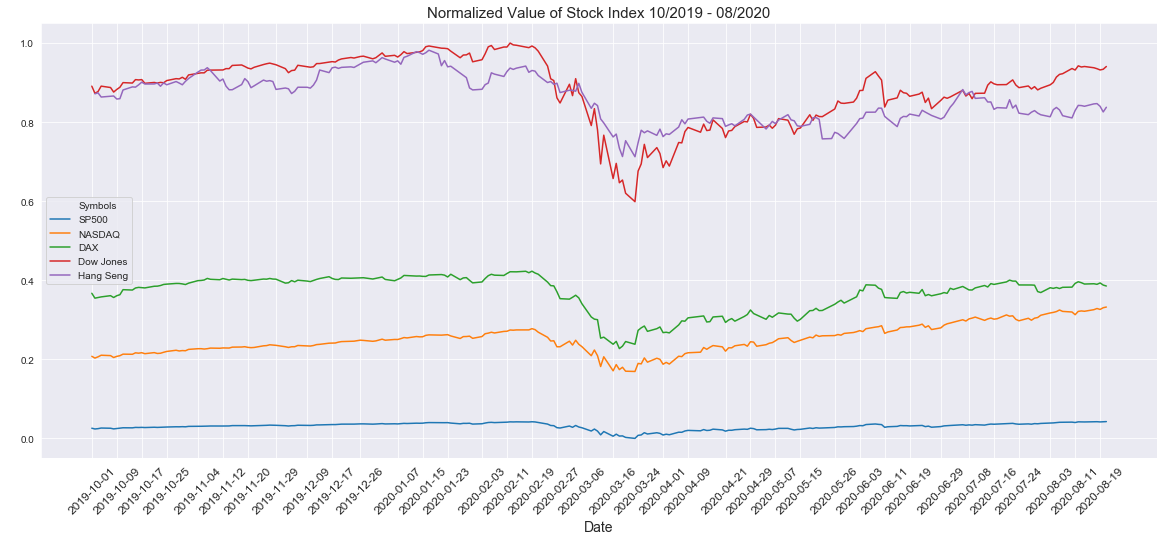

In [194]:
#Visual Data
date = list(stock_daily['Date'])
xticks = date[::30]

sns.set_style("darkgrid")
plt.figure(figsize=[20,8])
sns.lineplot(data = stock_daily, x = 'Date', y = 'Norm Close', hue = 'Symbols')
plt.xticks(xticks, rotation = 45, size = 12)
plt.xlabel('Date', size = 14)
plt.ylabel(" ")
plt.title('Normalized Value of Stock Index 10/2019 - 08/2020', size = 15)

In [210]:
stock_daily2000 = pdr.get_data_yahoo(stocks, start='2000-08-21', end='2020-08-21')
#reshape dataframe
stock_daily2000 = stock_daily2000.stack()
stock_daily2000.reset_index(inplace = True)

#rename stocks to make it easier to understand
stock_daily2000.replace({'Symbols': {'^GDAXI': 'DAX', '^HSI': 'Hang Seng', '^GSPC': 'SP500', '^IXIC':'NASDAQ', '^DJI':'Dow Jones'}}, 
         inplace = True)
stock_daily2000 = stock_daily2000[['Date', 'Symbols', 'Adj Close']]
stock_daily2000['pct'] = stock_daily2000.sort_values('Date').groupby(['Symbols'])['Adj Close'].pct_change()*100
sp500 = stock_daily2000[stock_daily2000['Symbols'] == 'SP500'][['Date','Adj Close','pct']]

In [211]:
sp500_biggest_loss = sp500.sort_values('pct', ascending = True).head(10)
sp500_biggest_loss

Attributes,Date,Adj Close,pct
24544,2020-03-16,2386.129883,-11.984055
24534,2020-03-12,2480.639893,-9.511268
10231,2008-10-15,907.840027,-9.034978
10393,2008-12-01,816.210022,-8.929524
10173,2008-09-29,1106.420044,-8.806776
10211,2008-10-09,909.919983,-7.616710
24519,2020-03-09,2746.560059,-7.596970
10361,2008-11-20,752.440002,-6.712293
13763,2011-08-08,1119.459961,-6.663446
10356,2008-11-19,806.580017,-6.115558


In [212]:
sp500_biggest_gain = sp500.sort_values('pct', ascending = False).head(10)
sp500_biggest_gain

Attributes,Date,Adj Close,pct
10221,2008-10-13,1003.349976,11.580037
10276,2008-10-28,940.510010,10.789006
24574,2020-03-24,2447.330078,9.382774
24539,2020-03-13,2711.020020,9.287125
10770,2009-03-23,822.919983,7.075755
24619,2020-04-06,2663.679932,7.033132
10336,2008-11-13,911.289978,6.921271
10371,2008-11-24,851.809998,6.472253
10725,2009-03-10,719.599976,6.366302
10366,2008-11-21,800.030029,6.324760


The market had a deep crash during March. Compared to the last 20 years, March 16th & March 12th were the most devasting day for SP500, even worse than 2008 Recession. However, because of the uncertainty of the situation, the losses were almost completely regained the next day, marking March 14th, 2020, the day with the fourth highest gains in the last 20 years. 

However, the stock market is slowly going up again, since there are hopes with the [new vaccines](https://finance.yahoo.com/news/stock-market-news-live-august-24-2020-111353198.html). Last week, stocks rose Friday and the S&P 500 and Nasdaq each set fresh record closing highs, after a slew of economic data released earlier reflected a faster than expected pick-up in multiple parts of the economy. 

## b. Tech & Airlines

In [203]:
#Load Stock Data
tech = ['AAPL', 'MSFT', 'TSLA', 'AMZN']
airlines = ['DAL', 'AAL', 'UAL', 'LUV']

tech_daily = pdr.get_data_yahoo(tech, start='2020-01-01', end='2020-08-21')
airlines_daily = pdr.get_data_yahoo(airlines, start='2020-01-01', end='2020-08-21')

tech_daily = tech_daily.stack()
tech_daily.reset_index(inplace = True)

airlines_daily = airlines_daily.stack()
airlines_daily.reset_index(inplace = True)

tech_daily  = tech_daily [['Date', 'Symbols', 'Adj Close']]
airlines_daily = airlines_daily[['Date', 'Symbols', 'Adj Close']]

Text(0.5, 1.0, 'Normalized Value of Big Tech Stock Index 01/2020 - 08/2020')

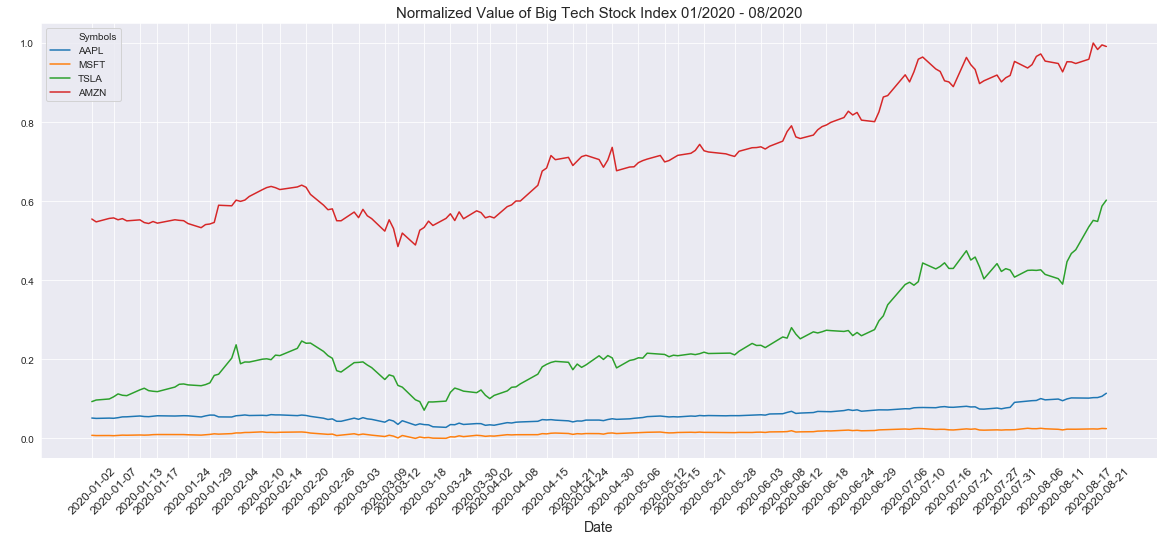

In [206]:
scaler = MinMaxScaler()
x = scaler.fit_transform(tech_daily[['Adj Close']])
tech_daily['Norm Close'] = x

date = list(tech_daily['Date'])
xticks = date[::15]

sns.set_style("darkgrid")
plt.figure(figsize=[20,8])
sns.lineplot(data = tech_daily, x = 'Date', y = 'Norm Close', hue = 'Symbols')
plt.xticks(xticks, rotation = 45, size = 12)
plt.xlabel('Date', size = 14)
plt.ylabel(" ")
plt.title('Normalized Value of Big Tech Stock Index 01/2020 - 08/2020', size = 15)

Text(0.5, 1.0, 'Normalized Value of Big Airlines Stock Index 01/2020 - 08/2020')

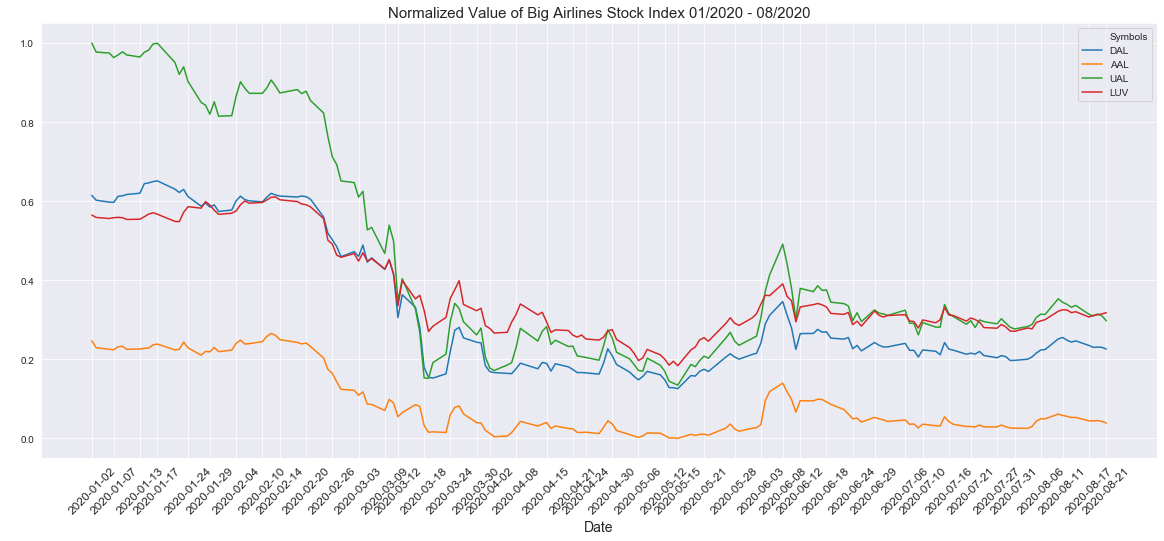

In [208]:
scaler = MinMaxScaler()
x = scaler.fit_transform(airlines_daily[['Adj Close']])
airlines_daily['Norm Close'] = x

date = list(airlines_daily['Date'])
xticks = date[::15]

sns.set_style("darkgrid")
plt.figure(figsize=[20,8])
sns.lineplot(data = airlines_daily, x = 'Date', y = 'Norm Close', hue = 'Symbols')
plt.xticks(xticks, rotation = 45, size = 12)
plt.xlabel('Date', size = 14)
plt.ylabel(" ")
plt.title('Normalized Value of Big Airlines Stock Index 01/2020 - 08/2020', size = 15)

So far, big tech companies are doing very well during pandemic. Tesla (TSLA) shares hit its highest level 2,000 per share. But seems like it won't stop at this price. Many analysts believe that it will even go higher after a stock split at the end of this month. Apple (AAPL) shares also hit a record high, solidifying its market capitalization at more than $2 trillion! And don't forget Amazon (AMZN), its stocks increase 67 percent per share over the last 6 months!

However, we cannot say the same thing for Airlines' stocks. Just like the market, during March 2020, big Airlines stocks crash. However, airline stocks are slowly going back up, since there are hopes with the new vaccines being developed. People are still hesistant with traveling, as the number of new cases are still increasing, and there are many travel bans from U.S., including Europe countries. 

## IV. Conclusion

COVID-19 has changed the world negatively and there's no sign of stopping yet. Although there are signs of hope, as the new vaccines are being developed, and the economy is slowly recovering, the current situation is very unstable with new, daily-life altering information being released every day. It remains to be seen whether the economy will enter a recession, and whether this will lead to a change in the White House.

## V. References

1. Covid-19 data is provided by [John Hopkins University](https://github.com/CSSEGISandData/COVID-19)
2. Trump's Aprroval Rating is provided by [FiveThirtyEight](https://projects.fivethirtyeight.com/trump-approval-ratings/)
3. The project was inspired by [this blog](https://towardsdatascience.com/the-political-and-economic-perspective-of-covid-19-c35c046ceffc)